In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', family='NanumGothic')

In [70]:
url = 'https://raw.githubusercontent.com/pinkocto/noteda/main/posts/SOLAR/data/df_new.csv'
df = pd.read_csv(url)

In [66]:
df1 = df.copy()

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18250 non-null  object 
 1   북춘천     18250 non-null  float64
 2   철원      18250 non-null  float64
 3   대관령     18250 non-null  float64
 4   춘천      18250 non-null  float64
 5   백령도     18250 non-null  float64
 6   북강릉     18250 non-null  float64
 7   강릉      18250 non-null  float64
 8   서울      18250 non-null  float64
 9   인천      18250 non-null  float64
 10  원주      18250 non-null  float64
 11  울릉도     18250 non-null  float64
 12  수원      18250 non-null  float64
 13  서산      18250 non-null  float64
 14  청주      18250 non-null  float64
 15  대전      18250 non-null  float64
 16  추풍령     18250 non-null  float64
 17  안동      18250 non-null  float64
 18  포항      18250 non-null  float64
 19  대구      18250 non-null  float64
 20  전주      18250 non-null  float64
 21  창원      18250 non-null  float64
 22

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df['date'].describe()

<ipython-input-8-07e98f8ab9f6>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['date'].describe()


count                   18250
unique                  16060
top       2021-08-13 07:00:00
freq                        2
first     2021-01-01 00:00:00
last      2022-12-31 21:00:00
Name: date, dtype: object

In [32]:
df.head()

,date,북춘천,철원,대관령,춘천,백령도,북강릉,강릉,서울,인천,...,순창군,북창원,양산시,보성군,강진군,의령군,함양군,광양시,청송군,경주시
0,2021-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


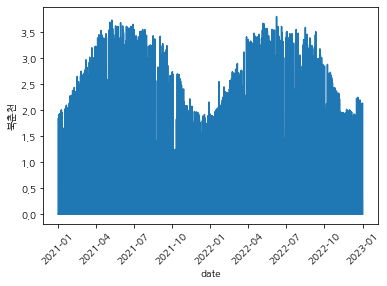

In [34]:
# 전체
sns.lineplot(data=df, x='date', y='북춘천')
plt.xticks(rotation=45)
plt.show()

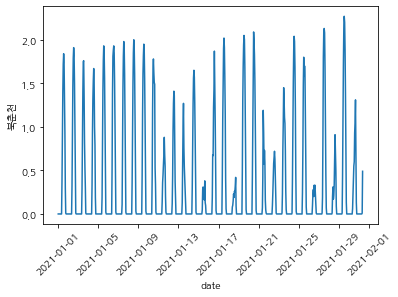

In [32]:
# 2021-01-01 부터 한달간.
sns.lineplot(data=df[:760], x='date', y='북춘천')
plt.xticks(rotation=45)
plt.show()

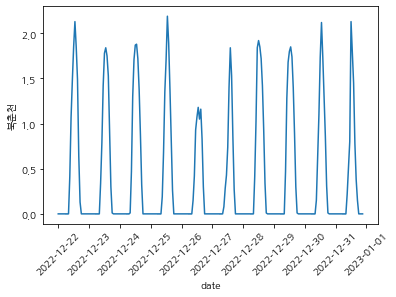

In [31]:
# 최근 10일간
sns.lineplot(data=df[df.shape[0]-250:], x='date', y='북춘천')
plt.xticks(rotation=45)
plt.show()

## ARIMA

In [17]:
import statsmodels.tsa.api as tsa

In [35]:
df.index

RangeIndex(start=0, stop=18250, step=1)

In [18]:
from pylab import rcParams

rcParams['figure.figsize'] = 15, 10

In [62]:
## 그림 그리기용
y1 = df_time['북춘천'].resample('1D').mean()

/home/jy/anaconda3/envs/torch/lib/python3.8/site-packages/statsmodels/tsa/seasonal.py:338: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
/home/jy/anaconda3/envs/torch/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


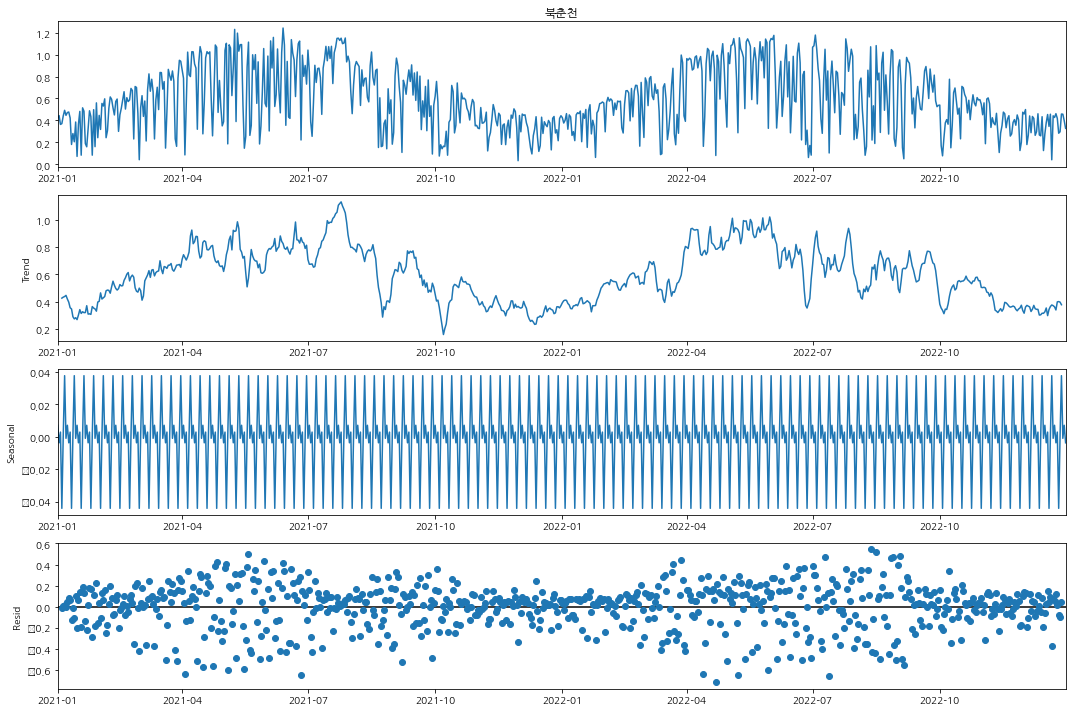

In [64]:
# 시계열 모델 생성
model_series = tsa.seasonal_decompose(y1, model = 'additive')
# 모델 시각화
fig = model_series.plot()
plt.show()

- Fig1: 트렌드 O
- Fig2: 계절성 O
- Fig3: 잔차

In [74]:
y1.shape , 365*2

((730,), 730)

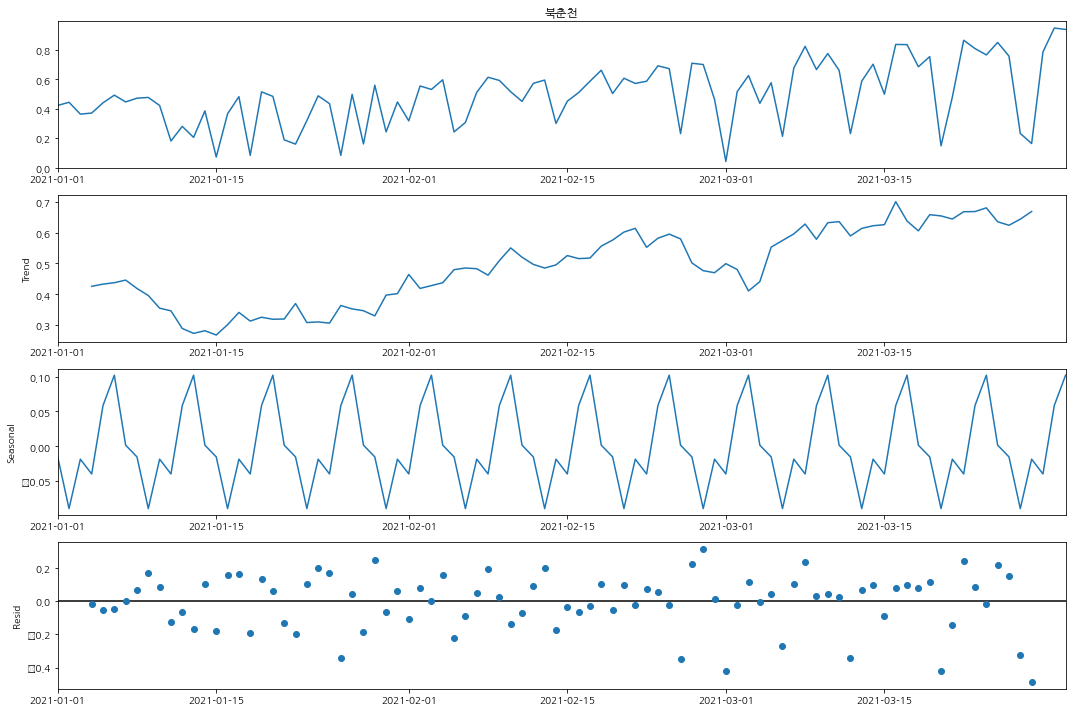

In [78]:
tsa.seasonal_decompose(y1[:90], model = 'additive').plot()
plt.show()

## --에러

```python
/home/jy/anaconda3/envs/torch/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
```

In [59]:
idx = len(df)*0.7
train = df.loc[0:idx].set_index('date').to_period('H')
test = df.loc[idx:].set_index('date').to_period('H')

In [77]:
train.index()

PeriodIndex(['2021-01-01 00:00', '2021-01-01 01:00', '2021-01-01 02:00',
             '2021-01-01 03:00', '2021-01-01 04:00', '2021-01-01 05:00',
             '2021-01-01 06:00', '2021-01-01 07:00', '2021-01-01 08:00',
             '2021-01-01 09:00',
             ...
             '2022-05-26 16:00', '2022-05-26 17:00', '2022-05-26 18:00',
             '2022-05-26 19:00', '2022-05-26 07:00', '2022-05-26 20:00',
             '2022-05-26 06:00', '2022-05-26 21:00', '2022-05-26 05:00',
             '2022-05-27 00:00'],
            dtype='period[H]', name='date', length=12776)

In [60]:
import itertools

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [ (x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] 

In [ ]:
param_list = []
param_seasonal_list = []
results_AIC_list = []
results_MSE_list = []

In [ ]:
y = train['북춘천']
y.index

PeriodIndex(['2021-01-01 00:00', '2021-01-01 01:00', '2021-01-01 02:00',
             '2021-01-01 03:00', '2021-01-01 04:00', '2021-01-01 05:00',
             '2021-01-01 06:00', '2021-01-01 07:00', '2021-01-01 08:00',
             '2021-01-01 09:00',
             ...
             '2022-05-26 16:00', '2022-05-26 17:00', '2022-05-26 18:00',
             '2022-05-26 19:00', '2022-05-26 07:00', '2022-05-26 20:00',
             '2022-05-26 06:00', '2022-05-26 21:00', '2022-05-26 05:00',
             '2022-05-27 00:00'],
            dtype='period[H]', name='date', length=12776)

In [ ]:
### 에러.. (시간빠진부분 있어서 그런듯)
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y, order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
            results_MSE_list.append(results.mse)
        except:
            continue

In [93]:
print(len(param_list), len(param_seasonal_list), len(results_AIC_list))

64 64 64


In [94]:
ARIMA_list = pd.DataFrame({'Parameter':param_list, 'Seasonal':param_seasonal_list, 'AIC':results_AIC_list})

In [98]:
ARIMA_list.sort_values(by='AIC')

,Parameter,Seasonal,AIC
56,"(1, 1, 1)","(0, 0, 0, 12)",-27.919333
57,"(1, 1, 1)","(0, 0, 1, 12)",-17.887908
60,"(1, 1, 1)","(1, 0, 0, 12)",-17.191112
61,"(1, 1, 1)","(1, 0, 1, 12)",-16.236937
24,"(0, 1, 1)","(0, 0, 0, 12)",2.108300
...,...,...,...
50,"(1, 1, 0)","(0, 1, 0, 12)",729.258196
18,"(0, 1, 0)","(0, 1, 0, 12)",819.565003
8,"(0, 0, 1)","(0, 0, 0, 12)",930.795162
1,"(0, 0, 0)","(0, 0, 1, 12)",1035.717831


In [102]:
mod = tsa.statespace.SARIMAX(y1, order=(1,1,1),
                                            seasonal_order=(0,0,0,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2286      0.035      6.544      0.000       0.160       0.297
ma.L1         -1.0822      0.017    -64.958      0.000      -1.115      -1.050
sigma2         0.0476      0.003     18.244      0.000       0.043       0.053


In [103]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                    북춘천   No. Observations:                  730
Model:               SARIMAX(1, 1, 1)   Log Likelihood                  16.960
Date:                Mon, 10 Apr 2023   AIC                            -27.919
Time:                        17:29:21   BIC                            -14.153
Sample:                    01-01-2021   HQIC                           -22.607
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2286      0.035      6.544      0.000       0.160       0.297
ma.L1         -1.0822      0.017    -64.958      0.000      -1.115      -1.050
sigma2         0.0476      0.003     18.244      0.0

## --

In [104]:
## MSE
def mse_(real, pred):
    diff = real - pred
    return mean(diff^2)

In [ ]:
## fitting


In [135]:
from sklearn.metrics import mean_squared_error as MSE

In [134]:
pred_y = results.predict(start = '2022-05-27 00:00:00', end='2022-12-31 05:00:00')

In [146]:
pred_y

2022-05-27    0.960337
2022-05-28    0.882472
2022-05-29    0.982962
2022-05-30    0.985353
2022-05-31    0.756740
                ...   
2022-12-28    0.337356
2022-12-29    0.383494
2022-12-30    0.388694
2022-12-31    0.375957
2023-01-01    0.356190
Freq: D, Name: predicted_mean, Length: 220, dtype: float64

- ref: [How to interpret Negative AIC Vluaes](https://www.statology.org/negative-aic/)